In [1]:
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
import seaborn as sns
from pycaret.regression import *


def one_hot_encoder(df, nan_as_category=True):
    """質的変数をダミー変数に変換"""
    original_columns = list(df.columns)
    # dtypeがobject(i.e.str)の系列のカラム名をリストアップ
    categorical_columns = [col for col in df.columns if df[col].dtype == 'object']
    # pd.get_dummiesでダミー変数に変換
    # 変換するカラムにはcategorical_columnsを指定
    # pd.get_dummiesではpandas.DataFrameを指定すると[元の列名_カテゴリー名]に変換される
    df = pd.get_dummies(df, columns=categorical_columns, dummy_na=nan_as_category)
    new_columns = [c for c in df.columns if c not in original_columns]
    return df, new_columns


def display_categorical_features(df, thresh=10):
    """データを最初にここに通して質的変数の確認を行う"""
    unique_count = df.select_dtypes('object').apply(pd.Series.nunique, axis=0)
    for idx in unique_count.index:
        if unique_count[idx] <= thresh:
            print(f"{idx}\t{unique_count[idx]}\t{df[idx].unique()}")
        else:
            print(f"{idx}\t{unique_count[idx]}")

In [2]:
df = pd.read_csv("train.csv").drop(["dateid"], axis=1)
display_categorical_features(df)
# df, new_columns = one_hot_encoder(df)

week	5	['Tue' 'Wed' 'Thu' 'Fri' 'Mon']
name	213
remarks	10	[nan 'お楽しみメニュー' '料理長のこだわりメニュー' 'スペシャルメニュー' '近隣に飲食店複合ビルオープン' '料理長イチオシ！'
 '料理長イチオシ!' '今月のイチオシ!' '今月のこだわりメニュー' 'コンビニ改装' '弁当種類増↓']
event	2	[nan 'ママの会' 'キャリアアップ支援セミナー']
weather	62


In [3]:
exp = setup(df, target="y", session_id=1, log_experiment=True, experiment_name="mufg")

,Description,Value
0,session_id,1
1,Target,y
2,Original Data,"(337, 11)"
3,Missing Values,True
4,Numeric Features,3
5,Categorical Features,7
6,Ordinal Features,False
7,High Cardinality Features,False
8,High Cardinality Method,None
9,Transformed Train Set,"(235, 226)"


In [4]:
compare_models()

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
br,Bayesian Ridge,11.2700,233.3832,15.0309,0.3522,0.2382,0.1934,0.0120
ridge,Ridge Regression,11.2934,235.5340,15.0817,0.3443,0.2400,0.1938,0.0050
gbr,Gradient Boosting Regressor,11.3832,242.5055,15.3503,0.3108,0.2369,0.1927,0.0270
rf,Random Forest Regressor,11.1008,244.3505,15.2631,0.2970,0.2338,0.1809,0.1670
lasso,Lasso Regression,12.2012,252.9649,15.8307,0.2912,0.2462,0.2090,0.0050
xgboost,Extreme Gradient Boosting,11.4061,255.0152,15.5636,0.2669,0.2422,0.1939,0.0720
huber,Huber Regressor,11.8478,262.4915,15.8953,0.2513,0.2476,0.1971,0.0110
ada,AdaBoost Regressor,12.2261,266.9096,16.2122,0.2252,0.2473,0.1993,0.0190
omp,Orthogonal Matching Pursuit,11.7681,277.7528,16.2897,0.2008,0.2466,0.1913,0.0050
lightgbm,Light Gradient Boosting Machine,12.2907,282.0264,16.5773,0.1814,0.2595,0.2060,0.0160


BayesianRidge(alpha_1=1e-06, alpha_2=1e-06, alpha_init=None,
              compute_score=False, copy_X=True, fit_intercept=True,
              lambda_1=1e-06, lambda_2=1e-06, lambda_init=None, n_iter=300,
              normalize=False, tol=0.001, verbose=False)

In [71]:
# model = create_model("rf")
# model = create_model("br")
# model = create_model("lasso")
# model = create_model("ridge")
# model = create_model("gbr")
# model = create_model("xgboost")
model = create_model("lightgbm")

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,11.9566,378.7340,19.4611,-0.0506,0.2979,0.2123
1,11.8124,214.5426,14.6473,0.4893,0.2353,0.2007
2,9.1398,142.0544,11.9187,0.7704,0.2022,0.1589
3,9.6877,157.4727,12.5488,0.4531,0.1841,0.1454
4,8.7203,143.4712,11.9779,0.6776,0.1716,0.1223
5,8.5624,136.7888,11.6957,0.5474,0.1844,0.1365
6,9.0960,147.2319,12.1339,0.6939,0.1706,0.1314
7,12.1666,228.8439,15.1276,0.5956,0.2271,0.2010
8,13.7403,291.5720,17.0755,-0.1306,0.2401,0.2169


In [72]:
print(model)

LGBMRegressor(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
              importance_type='split', learning_rate=0.1, max_depth=-1,
              min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
              n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
              random_state=3618, reg_alpha=0.0, reg_lambda=0.0, silent='warn',
              subsample=1.0, subsample_for_bin=200000, subsample_freq=0)


In [73]:
tuned_model = tune_model(model, optimize="RMSE")

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,16.9661,641.0353,25.3187,-0.7782,0.4252,0.3116
1,15.7022,351.2659,18.7421,0.1638,0.3069,0.2635
2,10.5061,206.6903,14.3767,0.6659,0.2492,0.2045
3,11.0915,194.4188,13.9434,0.3248,0.2038,0.1630
4,10.5489,190.5055,13.8024,0.5719,0.1777,0.1401
5,9.8849,280.6471,16.7525,0.0715,0.2875,0.1476
6,10.4573,163.8826,12.8017,0.6592,0.2085,0.1595
7,8.7309,124.8609,11.1741,0.7793,0.1918,0.1570
8,12.4087,256.8376,16.0262,0.0041,0.2684,0.2303


In [74]:
predict_model(tuned_model)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Light Gradient Boosting Machine,13.8674,372.3717,19.2969,-0.0162,0.2947,0.2210


,kcal,precipitation,temperature,week_Fri,week_Mon,week_Thu,week_Tue,week_Wed,soldout_0,name_いか天ぷら,...,weather_薄曇時々晴,weather_雨,weather_雨一時みぞれ,weather_雨一時曇,weather_雨後時々曇,weather_雨後曇,weather_雨時々曇,weather_雨時々曇一時雪,y,Label
0,420.0,1.5,12.900000,0.0,0.0,1.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,44.0,73.972015
1,436.0,14.5,9.800000,0.0,0.0,0.0,1.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,49.0,52.544689
2,433.0,0.0,7.100000,0.0,1.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,32.0,44.469854
3,363.0,0.0,25.799999,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,50.0,61.105863
4,445.0,2.0,15.400000,0.0,0.0,0.0,0.0,1.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,65.0,76.015698
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
97,415.0,0.0,29.700001,0.0,0.0,1.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,63.0,44.944039
98,426.0,0.0,23.200001,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,66.0,45.237212
99,333.0,0.0,17.700001,0.0,0.0,1.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,57.0,44.161421
100,350.0,40.0,15.300000,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,90.0,79.348903


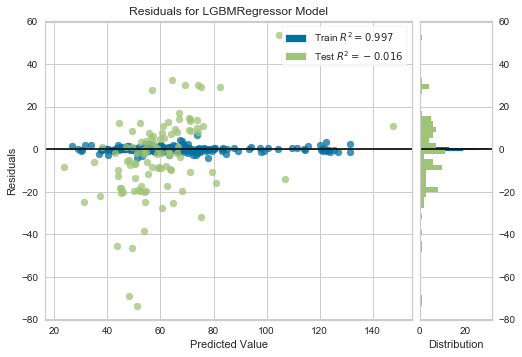

In [75]:
plot_model(tuned_model)

In [76]:
evaluate_model(tuned_model)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

In [77]:
final_model = finalize_model(tuned_model)

In [78]:
df_pred = pd.read_csv("test.csv")
df_dateid = df_pred["dateid"]
df_pred = df_pred.drop(["dateid"], axis=1)
df_pred = predict_model(final_model, data=df_pred)
df_submit = pd.concat([df_dateid, df_pred["Label"]], axis=1)
df_submit.columns = ["dateid", "y"]
df_submit.to_csv("submit.csv", index=False, header=False)

In [19]:
hoge = predict_model(tuned_model)
hoge.head()

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Random Forest Regressor,9.2846,145.2279,12.0511,0.4976,0.1909,0.1507


,kcal,precipitation,temperature,week_Fri,week_Mon,week_Thu,week_Tue,week_Wed,soldout_0,name_いか天ぷら,...,weather_雨,weather_雨一時曇,weather_雨後一時曇,weather_雨後時々曇,weather_雨後曇,weather_雨後曇、雷を伴う,weather_雨時々曇,weather_雨時々曇一時雪,y,Label
0,433.000000,9.0,2.6,0.0,0.0,1.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,89.0,57.710678
1,404.000000,0.0,23.5,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,56.0,57.725005
2,433.000000,18.0,3.6,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,56.0,70.154851
3,420.000000,0.0,7.3,1.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,44.0,47.363817
4,420.158661,0.0,8.9,1.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,121.0,108.765464


In [24]:
with open("colmuns.txt", "w", encoding="shift_jis") as f:
    f.write("\n".join(hoge.columns))